# Dummy variables

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [2]:
raw_data = pd.read_csv('1.03. Dummies.csv')

In [3]:
raw_data.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


## Map the data

In [4]:
data = raw_data.copy()

In [5]:
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})

In [6]:
data.head()

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


## Regression

In [7]:
x1 = data[['SAT', 'Attendance']]
y = data['GPA']

In [8]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Wed, 20 May 2020   Prob (F-statistic):           2.19e-15
Time:                        19:53:23   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
yhatyes = 0.6439 + 0.0014*data['SAT'] + 0.2226
yhatno = 0.6439 + 0.0014*data['SAT']

## Plot the regression line(s) on the scatter plot

Text(0, 0.5, 'GPA')

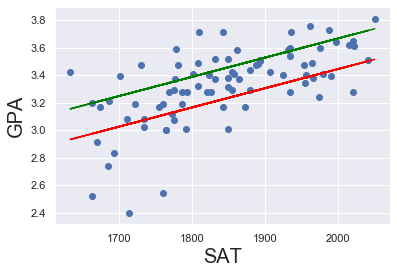

In [10]:
plt.scatter(x1['SAT'],y)
plt.plot(x1['SAT'], yhatno, color = 'red')
plt.plot(x1['SAT'], yhatyes, color = 'green')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)

## Plot the regression line(s) on the scatter plot and colour the data points

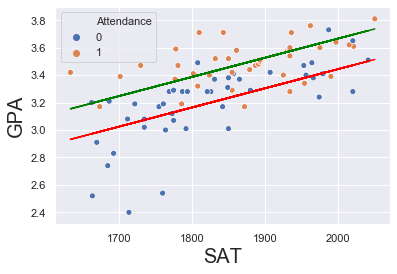

In [11]:
sns.scatterplot(data['SAT'], data['GPA'], hue = data['Attendance'])
plt.plot(x1['SAT'], yhatno, color = 'red')
plt.plot(x1['SAT'], yhatyes, color = 'green')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

## Add the regression line (without attendance) for comparison

In [12]:
xA = sm.add_constant(data['SAT'])
results = sm.OLS(data['GPA'], xA).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Wed, 20 May 2020   Prob (F-statistic):           7.20e-11
Time:                        19:53:24   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
yhat = 0.2750 + 0.0017*data['SAT']

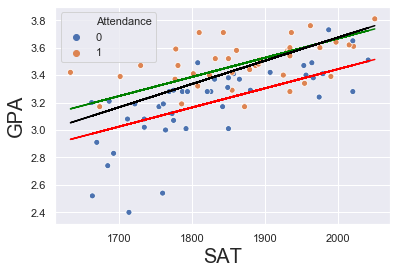

In [14]:
sns.scatterplot(data['SAT'], data['GPA'], hue = data['Attendance'])
plt.plot(x1['SAT'], yhatno, color = 'red')
plt.plot(x1['SAT'], yhatyes, color = 'green')
plt.plot(data['SAT'], yhat, color = 'black')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

# How to make predictions based on the regressions we create

In [15]:
x.head(2)

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0


In [16]:
new_data = pd.DataFrame({'const': 1, 'SAT': [1700, 1650], 'Attendance': [0,1]})

In [17]:
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1650,1


In [18]:
prediction = result.predict(new_data)

In [19]:
predictiondf = pd.DataFrame({'Predicted GPA': prediction})

In [20]:
new_data = new_data.join(predictiondf)

In [21]:
new_data

,const,SAT,Attendance,Predicted GPA
0,1,1700,0,3.023513
1,1,1650,1,3.176167
